In [177]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay,recall_score, precision_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
import time
from scipy.spatial.distance import cdist

# part A

In [178]:
data = pd.read_csv('input/P3/crx.data', header=None, na_values="?")
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-


In [179]:
data.isna().sum()

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64

In [180]:
data.shape

(690, 16)

now replace categorical value with int

In [181]:
data[0].replace(['a', 'b'], [0, 1], inplace=True)
data[3].replace(["u", "y", "l", "t"], [0, 1, 2, 3], inplace=True)
data[4].replace(["g", "p", "gg"], [0, 1, 2], inplace=True)
data[5].replace(["c", "d", "cc", "i", "j", "k", "m", "r", "q", "w", "x", "e", "aa", "ff"],
                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], inplace=True)
data[6].replace(["v", "h", "bb", "j", "n", "z", "dd", "ff", "o"], [0, 1, 2, 3, 4, 5, 6, 7, 8],
                inplace=True)
data[8].replace(['t', 'f'], [0, 1], inplace=True)
data[9].replace(['t', 'f'], [0, 1], inplace=True)
data[11].replace(['t', 'f'], [0, 1], inplace=True)
data[12].replace(['g', 'p', 's'], [0, 1, 2], inplace=True)
data[15].replace(['-', '+'], [0, 1], inplace=True)

data[13].fillna(0, inplace=True)

# data[2].replace("?" , 0, inplace=True)
data[2].fillna(data[2].mean(), inplace=True)

# data[3].fillna(0, inplace=True)
data[3].fillna(data[3].mean(), inplace=True)

data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,30.83,0.000,0.0,0.0,9.0,0.0,1.25,0,0,1,1,0,202.0,0,1
1,0.0,58.67,4.460,0.0,0.0,8.0,1.0,3.04,0,0,6,1,0,43.0,560,1
2,0.0,24.50,0.500,0.0,0.0,8.0,1.0,1.50,0,1,0,1,0,280.0,824,1
3,1.0,27.83,1.540,0.0,0.0,9.0,0.0,3.75,0,0,5,0,0,100.0,3,1
4,1.0,20.17,5.625,0.0,0.0,9.0,0.0,1.71,0,1,0,1,2,120.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,21.08,10.085,1.0,1.0,11.0,1.0,1.25,1,1,0,1,0,260.0,0,0
686,0.0,22.67,0.750,0.0,0.0,0.0,0.0,2.00,1,0,2,0,0,200.0,394,0
687,0.0,25.25,13.500,1.0,1.0,13.0,7.0,2.00,1,0,1,0,0,200.0,1,0
688,1.0,17.92,0.205,0.0,0.0,12.0,0.0,0.04,1,1,0,1,0,280.0,750,0


In [182]:
data.dropna(inplace=True)
data.shape

(659, 16)

normalize data betweeen 0 and 1

In [183]:
columns_data = data.columns

data[columns_data[:-1]] = ((data[columns_data[:-1]] - data[columns_data[:-1]].min()) / (
        data[columns_data[:-1]].max() - data[columns_data[:-1]].min()))

In [184]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.271111,0.000000,0.0,0.0,0.692308,0.000,0.043860,0.0,0.0,0.014925,1.0,0.0,0.1010,0.00000,1
1,0.0,0.713016,0.159286,0.0,0.0,0.615385,0.125,0.106667,0.0,0.0,0.089552,1.0,0.0,0.0215,0.00560,1
2,0.0,0.170635,0.017857,0.0,0.0,0.615385,0.125,0.052632,0.0,1.0,0.000000,1.0,0.0,0.1400,0.00824,1
3,1.0,0.223492,0.055000,0.0,0.0,0.692308,0.000,0.131579,0.0,0.0,0.074627,0.0,0.0,0.0500,0.00003,1
4,1.0,0.101905,0.200893,0.0,0.0,0.692308,0.000,0.060000,0.0,1.0,0.000000,1.0,1.0,0.0600,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.116349,0.360179,0.5,0.5,0.846154,0.125,0.043860,1.0,1.0,0.000000,1.0,0.0,0.1300,0.00000,0
686,0.0,0.141587,0.026786,0.0,0.0,0.000000,0.000,0.070175,1.0,0.0,0.029851,0.0,0.0,0.1000,0.00394,0
687,0.0,0.182540,0.482143,0.5,0.5,1.000000,0.875,0.070175,1.0,0.0,0.014925,0.0,0.0,0.1000,0.00001,0
688,1.0,0.066190,0.007321,0.0,0.0,0.923077,0.000,0.001404,1.0,1.0,0.000000,1.0,0.0,0.1400,0.00750,0


outlier detection

In [185]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data)
K = [3, 4, 5, 6, 7, 8, 10, 12, 15, 18, 20]

clusters_inertia = []

In [186]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(data[columns_data[:-2]])

    distortions.append(sum(np.min(cdist(data[columns_data[:-2]], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(data[columns_data[:-2]], kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / data.shape[0]
    mapping2[k] = kmeanModel.inertia_

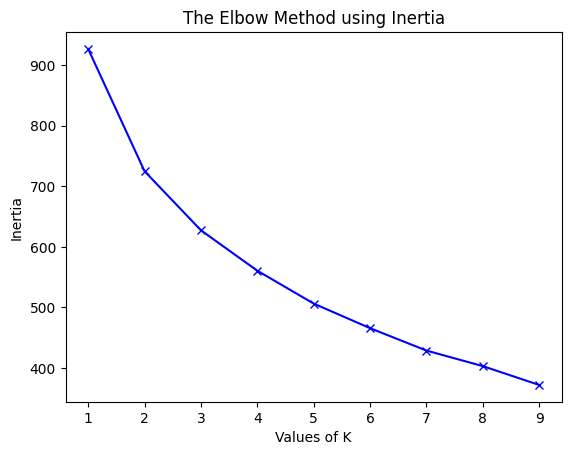

In [187]:

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

k= 4

In [188]:
kmeanModel = KMeans(n_clusters=4).fit(data[columns_data[:-2]])
kmeanModel.cluster_centers_

array([[ 6.69117647e-01,  3.04456116e-01,  1.91469275e-01,
         9.19117647e-02,  9.19117647e-02,  4.35520362e-01,
         1.11213235e-01,  1.24428535e-01,  2.05882353e-01,
        -1.11022302e-16,  8.39552239e-02,  1.11022302e-16,
         0.00000000e+00,  1.02003676e-01],
       [ 7.08661417e-01,  3.03595801e-01,  1.82379078e-01,
         1.14173228e-01,  1.14173228e-01,  4.80314961e-01,
         1.13188976e-01,  9.46953999e-02, -3.33066907e-16,
         1.00000000e+00,  2.08166817e-17,  4.56692913e-01,
         1.41732283e-01,  9.50314961e-02],
       [ 6.36363636e-01,  3.01663575e-01,  2.19327458e-01,
         6.49350649e-02,  6.49350649e-02,  5.16483516e-01,
         1.67207792e-01,  9.47619048e-02,  2.40259740e-01,
         0.00000000e+00,  8.54816825e-02,  1.00000000e+00,
         1.94805195e-02,  7.10811688e-02],
       [ 7.23140496e-01,  2.43452053e-01,  1.28984652e-01,
         1.75619835e-01,  1.75619835e-01,  4.12587413e-01,
         1.66322314e-01,  3.51413658e-02,  1.

In [189]:
m, n = data.shape

In [190]:
all_dists = cdist(data[columns_data[:-2]], kmeanModel.cluster_centers_, 'euclidean')
dists = []

for index, row in enumerate(all_dists):
    dists.append(min(row))
dists = sorted(dists)
dists

[0.4346350134101893,
 0.4422826293986589,
 0.44779220941740094,
 0.47487412858851574,
 0.4816499676072542,
 0.48984977204752406,
 0.4943651712894838,
 0.49851157118320005,
 0.5026351612061403,
 0.5103913418297614,
 0.5123967657593126,
 0.5137900484721856,
 0.5165838822826547,
 0.5193672016365557,
 0.520797614188831,
 0.5238403933143748,
 0.524300754475089,
 0.5244958591968625,
 0.5262990141182037,
 0.5273035918520745,
 0.5283332375165674,
 0.528821505428622,
 0.5328790601480853,
 0.5334730663024122,
 0.5335074256010337,
 0.534738701169062,
 0.5364852046181167,
 0.5386791994551028,
 0.5396253913139899,
 0.5433679730860066,
 0.5450198236957304,
 0.5458376102526419,
 0.5470075433982989,
 0.5471215156147786,
 0.5480219296739882,
 0.5504171508324935,
 0.5550312682606672,
 0.5578209545540135,
 0.5605077742567878,
 0.5613766170112644,
 0.5625992878802641,
 0.5640783739270665,
 0.5671719088222681,
 0.5684914225163823,
 0.5697384963307713,
 0.5734209446222567,
 0.5752075746767269,
 0.5757100476

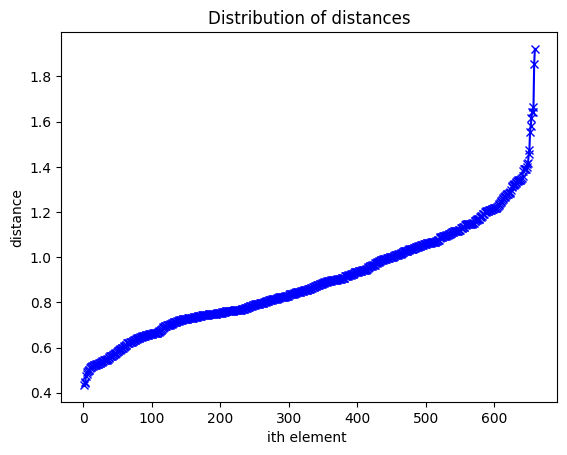

In [191]:
X = np.arange(1, m + 1)
plt.plot(X, dists, 'bx-')
plt.xlabel('ith element ')
plt.ylabel('distance')
plt.title('Distribution of distances')
plt.show()

In [192]:
threshold = 1.2
must_remove = []
for index, row in enumerate(all_dists):
    dist_to_center = min(row)
    if threshold < dist_to_center:
        must_remove.append(index)

len(must_remove)

73

In [193]:
data.drop(index=data.index[must_remove], axis=0, inplace=True)
data.shape

(586, 16)

split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(data[columns_data[:-1]], data[columns_data[-1]], test_size=0.15,
                                                    random_state=55)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((498, 15), (88, 15), (498,), (88,))

# Part B

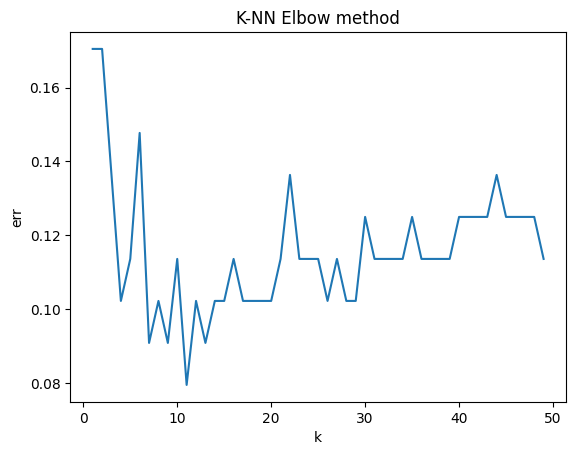

In [235]:
k_indexes = []
errors = []

for i in range(1, 50):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train, y_train)
    y_pred = KNN_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    err = 1 - acc

    k_indexes.append(i)
    errors.append(err)

plt.title("K-NN Elbow method")
plt.ylabel("err")
plt.xlabel("k")
plt.plot(k_indexes, errors)
plt.show()

# k = 7

In [240]:
start_time = time.time()
KNN_model = KNeighborsClassifier(n_neighbors=8)
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)
print(f'Time training => {time.time() - start_time} seconds')

Time training => 0.0050160884857177734 seconds


In [237]:
start_time = time.time()
KNN_model.predict(X_train.iloc[[0]])
print(f'Time for prediction one data point => {time.time() - start_time} seconds')

Time for prediction one data point => 0.002996206283569336 seconds


In [238]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        50
           1       0.87      0.89      0.88        38

    accuracy                           0.90        88
   macro avg       0.90      0.90      0.90        88
weighted avg       0.90      0.90      0.90        88



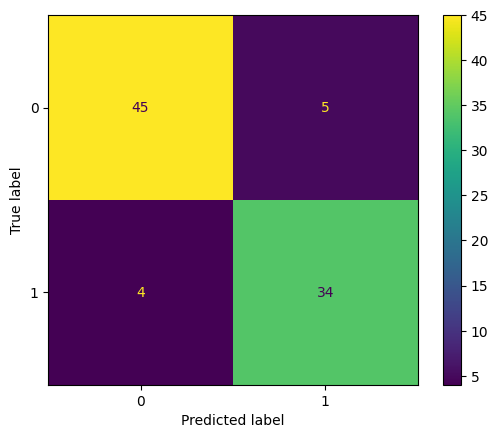

In [239]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

cm_display.plot()
plt.show()

# Part C

In [241]:
start_time = time.time()
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'Time training => {time.time() - start_time} seconds')

Time training => 0.005020618438720703 seconds


In [204]:
start_time = time.time()
clf.predict(X_train.iloc[[0]])
print(f'Time for prediction one data point => {time.time() - start_time} seconds')

Time for prediction one data point => 0.0019986629486083984 seconds


Confusion matrix:


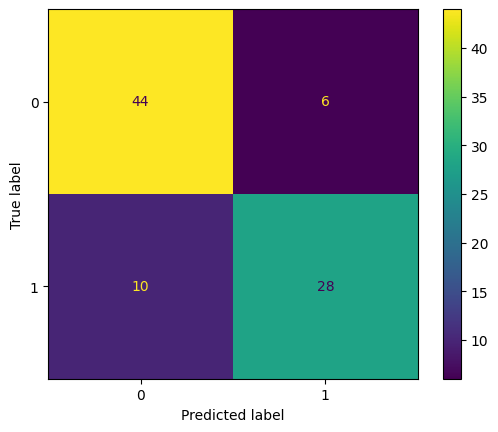

In [205]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

cm_display.plot()
plt.show()

In [206]:
X, y = data[columns_data[:-1]], data[columns_data[-1]]

recall = cross_val_score(clf, X, y, cv=5, scoring="recall_macro")
precision = cross_val_score(clf, X, y, cv=5, scoring="precision_macro")
accuracy = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        50
           1       0.82      0.74      0.78        38

    accuracy                           0.82        88
   macro avg       0.82      0.81      0.81        88
weighted avg       0.82      0.82      0.82        88



# Part D

In [208]:
param_grid = {
    "n_estimators": [25, 50, 100],
    "max_depth": [5, 10],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 4],
}

In [242]:
start_time = time.time()

clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'Time training => {time.time() - start_time} seconds')

Time training => 5.262007474899292 seconds


In [210]:
start_time = time.time()
clf.predict(X_train.iloc[[0]])
print(f'Time for prediction one data point => {time.time() - start_time} seconds')

Time for prediction one data point => 0.0029954910278320312 seconds


Confusion matrix:


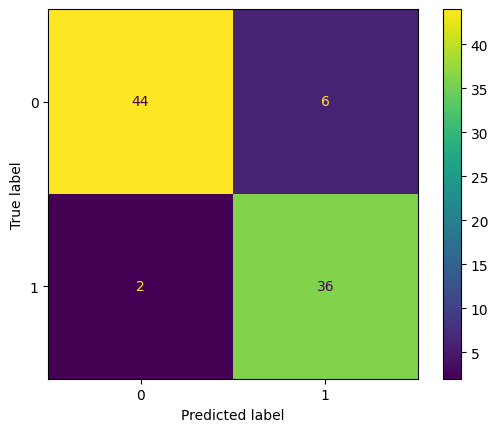

In [211]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [212]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        50
           1       0.86      0.95      0.90        38

    accuracy                           0.91        88
   macro avg       0.91      0.91      0.91        88
weighted avg       0.91      0.91      0.91        88



# Part E

In [243]:
start_time = time.time()
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f'Time training => {time.time() - start_time} seconds')

Time training => 0.004000186920166016 seconds


In [214]:
start_time = time.time()
clf.predict(X_train.iloc[[0]])
print(f'Time for prediction one data point => {time.time() - start_time} seconds')

Time for prediction one data point => 0.0019910335540771484 seconds


Confusion matrix:


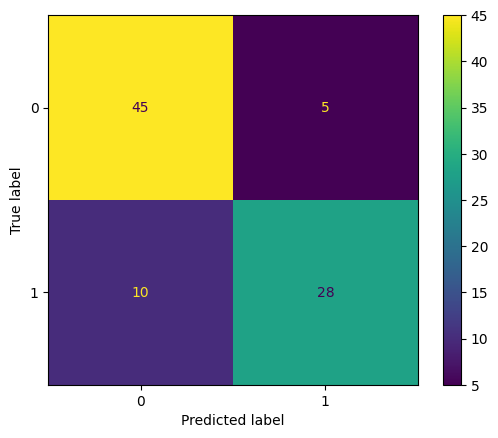

In [215]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [216]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        50
           1       0.85      0.74      0.79        38

    accuracy                           0.83        88
   macro avg       0.83      0.82      0.82        88
weighted avg       0.83      0.83      0.83        88



# Part F

In [244]:
start_time = time.time()

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(f'Time training => {time.time() - start_time} seconds')

Time training => 0.0059947967529296875 seconds


In [218]:
start_time = time.time()
clf.predict(X_train.iloc[[0]])
print(f'Time for prediction one data point => {time.time() - start_time} seconds')

Time for prediction one data point => 0.0019943714141845703 seconds


Confusion matrix:


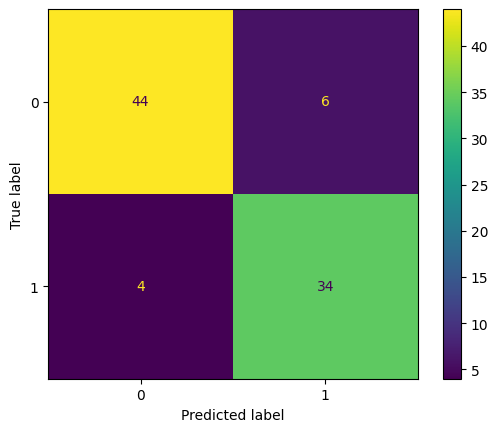

In [219]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [220]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        50
           1       0.85      0.89      0.87        38

    accuracy                           0.89        88
   macro avg       0.88      0.89      0.88        88
weighted avg       0.89      0.89      0.89        88



# Part G

In [245]:
start_time = time.time()
clf = SVC(kernel='poly', C=0.8, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f'Time training => {time.time() - start_time} seconds')

Time training => 0.00699925422668457 seconds


In [222]:
start_time = time.time()
clf.predict(X_train.iloc[[0]])
print(f'Time for prediction one data point => {time.time() - start_time} seconds')

Time for prediction one data point => 0.0010018348693847656 seconds


Confusion matrix:


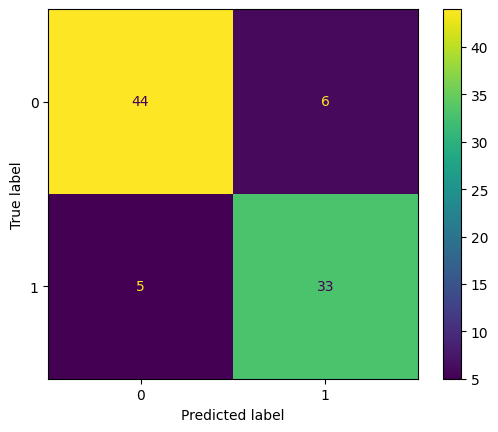

In [223]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        50
           1       0.85      0.87      0.86        38

    accuracy                           0.88        88
   macro avg       0.87      0.87      0.87        88
weighted avg       0.88      0.88      0.88        88



# Part H

In [246]:
start_time = time.time()
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f'Time training => {time.time() - start_time} seconds')

Time training => 0.09200692176818848 seconds


In [226]:
start_time = time.time()
clf.predict(X_train.iloc[[0]])
print(f'Time for prediction one data point => {time.time() - start_time} seconds')

Time for prediction one data point => 0.007009029388427734 seconds


Confusion matrix:


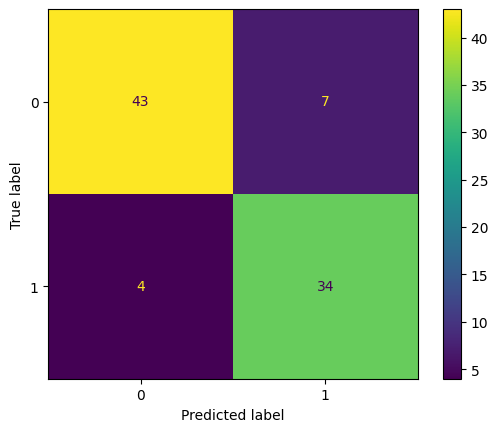

In [227]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [228]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        50
           1       0.83      0.89      0.86        38

    accuracy                           0.88        88
   macro avg       0.87      0.88      0.87        88
weighted avg       0.88      0.88      0.88        88



# Part i

In [284]:
start_time = time.time()
X, labels = data[columns_data[:-1]], data[columns_data[-1]]
labels = labels.to_numpy()
kmeans = KMeans(n_clusters=2, random_state=0)
train_preds = kmeans.fit_predict(X_train)
print(f'Time training => {time.time() - start_time} seconds')

Time training => 0.024992942810058594 seconds


In [285]:
start_time = time.time()
kmeans.predict(X_test.iloc[[0]])
print(f'Time for prediction one data point => {time.time() - start_time} seconds')

Time for prediction one data point => 0.005000114440917969 seconds


In [279]:
pred_labels = kmeans.predict(X_test)

voting

In [280]:
true_predict = 0
false_predict = 0

y_labels = y_train.to_numpy()
for i in range(pred_labels.shape[0]):
    if train_preds[i] == y_labels[i]:
        true_predict += 1
    else:
        false_predict += 1

if false_predict > true_predict:
    #swap labels
    pred_labels[pred_labels == 0] = -1
    pred_labels[pred_labels == 1] = 0
    pred_labels[pred_labels == -1] = 1

In [282]:
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91        50
           1       0.84      0.97      0.90        38

    accuracy                           0.91        88
   macro avg       0.91      0.92      0.91        88
weighted avg       0.92      0.91      0.91        88



Confusion matrix:


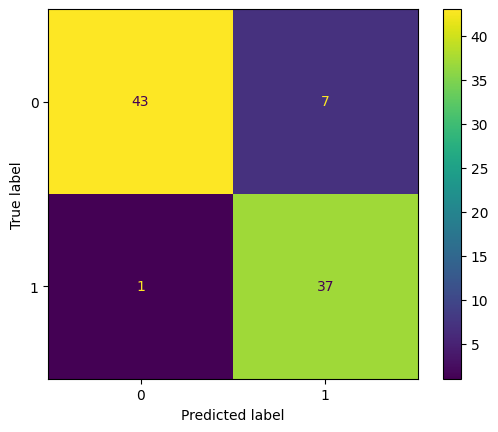

In [283]:
cm = confusion_matrix(y_test, pred_labels)
print("Confusion matrix:")
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()

# Part K

In [334]:
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=0)
train_preds = kmeans.fit_predict(X_train)
print(f'Time training => {time.time() - start_time} seconds')

Time training => 0.02799224853515625 seconds


In [335]:
kmeans.cluster_centers_

array([[7.63005780e-01, 2.37024498e-01, 1.27199628e-01, 1.61849711e-01,
        1.61849711e-01, 3.85060027e-01, 9.24855491e-02, 3.40036507e-02,
        1.00000000e+00, 1.00000000e+00, 6.93889390e-17, 6.12716763e-01,
        7.80346821e-02, 9.35693642e-02, 2.14647399e-03],
       [7.20238095e-01, 3.04110922e-01, 1.76091624e-01, 9.52380952e-02,
        9.52380952e-02, 4.34981685e-01, 8.63095238e-02, 1.15148287e-01,
        1.25000000e-01, 3.39285714e-01, 5.68585643e-02, 8.88178420e-16,
        1.78571429e-02, 1.01389881e-01, 7.78482143e-03],
       [6.56050955e-01, 3.01043373e-01, 2.11479754e-01, 5.09554140e-02,
        5.09554140e-02, 4.63498285e-01, 1.01910828e-01, 9.18918315e-02,
        8.91719745e-02, 2.86624204e-01, 6.22682765e-02, 1.00000000e+00,
        4.45859873e-02, 7.44235669e-02, 1.74276433e-02]])

In [336]:
clusters_label = KNN_model.predict(kmeans.cluster_centers_)

In [337]:
import math
def find_nearest_centroid_id(v: np.ndarray, list_of_vectors: np.ndarray):
    m, _ = list_of_vectors.shape

    min_index = 0
    min_value = math.inf

    # for each centroid
    for i in range(m):
        dist = np.linalg.norm(v - list_of_vectors[i, :])
        if dist < min_value:
            min_value = dist
            min_index = i

    return min_index

In [338]:
def predict_by_Kmeans_multi_centroids(input: np.ndarray, centroid_labels, centroids: np.ndarray):
    m, n = input.shape
    labels = []

    # for each data
    for i in range(m):
        centroid_index = find_nearest_centroid_id(input[i, :], centroids)
        labels.append(centroid_labels[centroid_index])

    labels = np.array(labels)
    return labels

In [341]:
start_time = time.time()
y_pred = predict_by_Kmeans_multi_centroids(X_test.to_numpy(),clusters_label, kmeans.cluster_centers_)
print(f'Time for prediction one data point => {time.time() - start_time} seconds')

Time for prediction one data point => 0.0009996891021728516 seconds


In [340]:
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91        50
           1       0.84      0.97      0.90        38

    accuracy                           0.91        88
   macro avg       0.91      0.92      0.91        88
weighted avg       0.92      0.91      0.91        88



Confusion matrix:


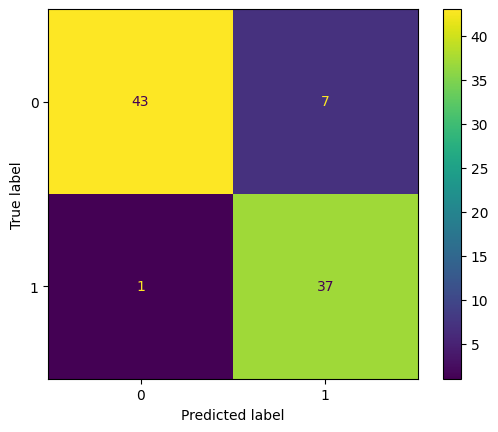

In [333]:
cm = confusion_matrix(y_test, pred_labels)
print("Confusion matrix:")
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_display.plot()
plt.show()